In [1]:
# pip install tensorflow==2.2.0

In [2]:
# pip install keras==2.4.3

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data=pd.read_excel(r"C:\Users\negil\Desktop\crude oil_new with ibm\dataset\Crude Oil Prices Daily.xlsx")

In [5]:
data.head()

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [6]:
data.tail()

,Date,Closing Value
8218,2018-07-03,74.19
8219,2018-07-04,NaN
8220,2018-07-05,73.05
8221,2018-07-06,73.78
8222,2018-07-09,73.93


In [7]:
data.describe()

,Closing Value
count,8216.000000
mean,43.492139
std,29.616804
min,10.250000
25%,19.577500
50%,29.610000
75%,63.402500
max,145.310000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 2 columns):
Date             8223 non-null datetime64[ns]
Closing Value    8216 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 128.6 KB


In [9]:
data.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [10]:
data.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [11]:
data.dropna(axis=0,inplace=True)

In [12]:
data.isnull().sum()

Date             0
Closing Value    0
dtype: int64

In [13]:
data.shape

(8216, 2)

In [14]:
import tensorflow as tf

In [15]:
tf.__version__

'2.2.0'

In [16]:
import tensorflow.keras

In [17]:
tensorflow.keras.__version__

'2.3.0-tf'

In [18]:
data_oil=data.reset_index()['Closing Value']

In [19]:
data_oil

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
5       26.03
6       25.65
7       25.08
8       24.97
9       25.18
10      23.98
11      23.63
12      21.33
13      20.61
14      20.25
15      19.93
16      19.45
17      20.87
18      19.45
19      19.61
20      19.58
21      18.95
22      17.42
23      15.58
24      16.28
25      16.60
26      17.70
27      16.78
28      16.28
29      15.74
        ...  
8186    66.47
8187    66.73
8188    68.21
8189    67.04
8190    65.81
8191    64.75
8192    65.52
8193    64.75
8194    65.96
8195    65.77
8196    66.10
8197    66.38
8198    66.63
8199    66.91
8200    65.01
8201    65.91
8202    65.09
8203    65.92
8204    65.68
8205    69.02
8206    69.91
8207    75.23
8208    77.41
8209    73.45
8210    74.13
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

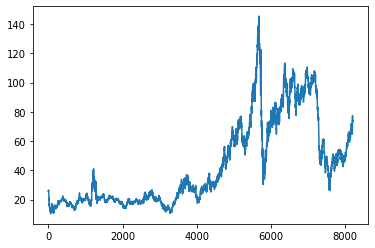

In [20]:
plt.plot(data_oil)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_oil=scaler.fit_transform(np.array(data_oil).reshape(-1,1))

In [22]:
print(data_oil)

[[0.11335703]
 [0.11661484]
 [0.12053902]
 ...
 [0.46497853]
 [0.47038353]
 [0.47149415]]


In [23]:
training_size=int(len(data_oil)*0.65)
test_size=len(data_oil)-training_size
train_data,test_data=data_oil[0:training_size,:],data_oil[training_size:len(data_oil),:1]

In [24]:
training_size,test_size

(5340, 2876)

In [25]:
train_data

array([[0.11335703],
       [0.11661484],
       [0.12053902],
       ...,
       [0.37916482],
       [0.38153413],
       [0.38294092]])

In [26]:
train_data.shape

(5340, 1)

In [27]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [28]:
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [29]:
print(X_train.shape), print(y_train.shape)

(5329, 10)
(5329,)


(None, None)

In [30]:
print(X_test.shape), print(ytest.shape)

(2865, 10)
(2865,)


(None, None)

In [31]:
X_train

array([[0.11335703, 0.11661484, 0.12053902, ..., 0.10980305, 0.1089886 ,
        0.11054346],
       [0.11661484, 0.12053902, 0.11550422, ..., 0.1089886 , 0.11054346,
        0.10165852],
       [0.12053902, 0.11550422, 0.1156523 , ..., 0.11054346, 0.10165852,
        0.09906708],
       ...,
       [0.36731823, 0.35176958, 0.36080261, ..., 0.36391234, 0.37042796,
        0.37042796],
       [0.35176958, 0.36080261, 0.35354657, ..., 0.37042796, 0.37042796,
        0.37879461],
       [0.36080261, 0.35354657, 0.35295424, ..., 0.37042796, 0.37879461,
        0.37916482]])

In [32]:
y_train

array([0.10165852, 0.09906708, 0.08203761, ..., 0.37879461, 0.37916482,
       0.38153413])

In [33]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [35]:
model=Sequential()

In [36]:
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))

In [37]:
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 50)            20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
84/84 [==============================] - 6s 73ms/step - loss: 0.0017 - val_loss: 9.5112e-04
Epoch 2/50
84/84 [==============================] - 3s 37ms/step - loss: 1.2971e-04 - val_loss: 7.8501e-04
Epoch 3/50
84/84 [==============================] - 4s 47ms/step - loss: 1.2584e-04 - val_loss: 8.2648e-04
Epoch 4/50
84/84 [==============================] - 4s 44ms/step - loss: 1.3400e-04 - val_loss: 8.5118e-04
Epoch 5/50
84/84 [==============================] - 4s 46ms/step - loss: 1.2528e-04 - val_loss: 0.0011
Epoch 6/50
84/84 [==============================] - 4s 52ms/step - loss: 1.3583e-04 - val_loss: 7.9431e-04
Epoch 7/50
84/84 [==============================] - 4s 47ms/step - loss: 1.2785e-04 - val_loss: 7.5845e-04
Epoch 8/50
84/84 [==============================] - 4s 44ms/step - loss: 1.1932e-04 - val_loss: 0.0010
Epoch 9/50
84/84 [==============================] - 4s 46ms/step - loss: 1.2242e-04 - val_loss: 7.1165e-04
Epoch 10/50
84/84 [==============================

In [40]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [41]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [42]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

29.35086694818881

In [43]:
math.sqrt(mean_squared_error(ytest,test_predict))

77.68448535062639

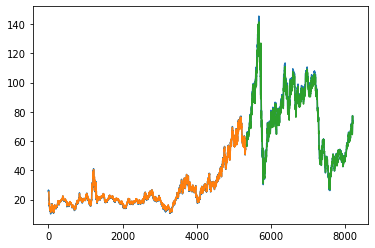

In [44]:
look_back=10
trainPredictPlot = np.empty_like(data_oil)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data_oil)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data_oil)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data_oil))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [45]:
model.save("crude_oil.h5")

In [46]:
len(test_data)

2876

In [47]:
x_input=test_data[2866:].reshape(1,-1)
x_input.shape

(1, 10)

In [48]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [49]:
temp_input

[0.44172960165852215,
 0.48111950244335855,
 0.49726047682511476,
 0.4679401747371539,
 0.4729749740855915,
 0.47119798608026064,
 0.47341922108692425,
 0.4649785280616022,
 0.4703835332444839,
 0.47149415074781587]

In [50]:
len(temp_input)

10

In [51]:
from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<10):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[0.46755934]
11
1 day input [0.4811195  0.49726048 0.46794017 0.47297497 0.47119799 0.47341922
 0.46497853 0.47038353 0.47149415 0.46755934]
1 day output [[0.4639035]]
2 day input [0.49726048 0.46794017 0.47297497 0.47119799 0.47341922 0.46497853
 0.47038353 0.47149415 0.46755934 0.46390349]
2 day output [[0.45939308]]
3 day input [0.46794017 0.47297497 0.47119799 0.47341922 0.46497853 0.47038353
 0.47149415 0.46755934 0.46390349 0.45939308]
3 day output [[0.45430166]]
4 day input [0.47297497 0.47119799 0.47341922 0.46497853 0.47038353 0.47149415
 0.46755934 0.46390349 0.45939308 0.45430166]
4 day output [[0.44945288]]
5 day input [0.47119799 0.47341922 0.46497853 0.47038353 0.47149415 0.46755934
 0.46390349 0.45939308 0.45430166 0.44945288]
5 day output [[0.4449876]]
6 day input [0.47341922 0.46497853 0.47038353 0.47149415 0.46755934 0.46390349
 0.45939308 0.45430166 0.44945288 0.4449876 ]
6 day output [[0.4410736]]
7 day input [0.46497853 0.47038353 0.47149415 0.46755934 0.46390349 0

In [52]:
day_new=np.arange(1,11)
day_pred=np.arange(11,21)

In [53]:
len(data_oil)

8216

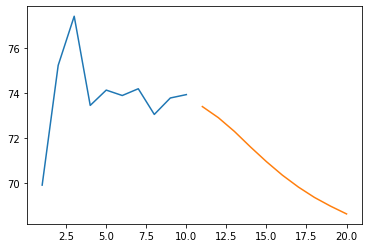

In [54]:
plt.plot(day_new,scaler.inverse_transform(data_oil[8206:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

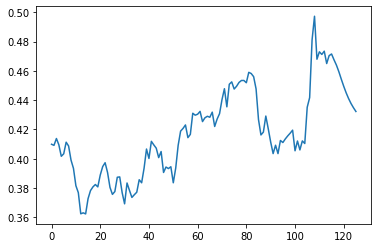

In [55]:
df3=data_oil.tolist()
df3.extend(lst_output)
plt.plot(df3[8100:])

In [56]:
df3=scaler.inverse_transform(df3).tolist()

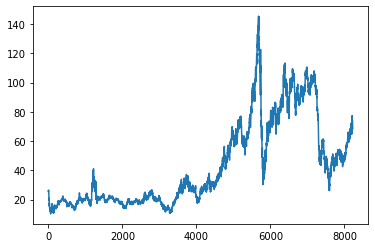

In [57]:
plt.plot(df3)